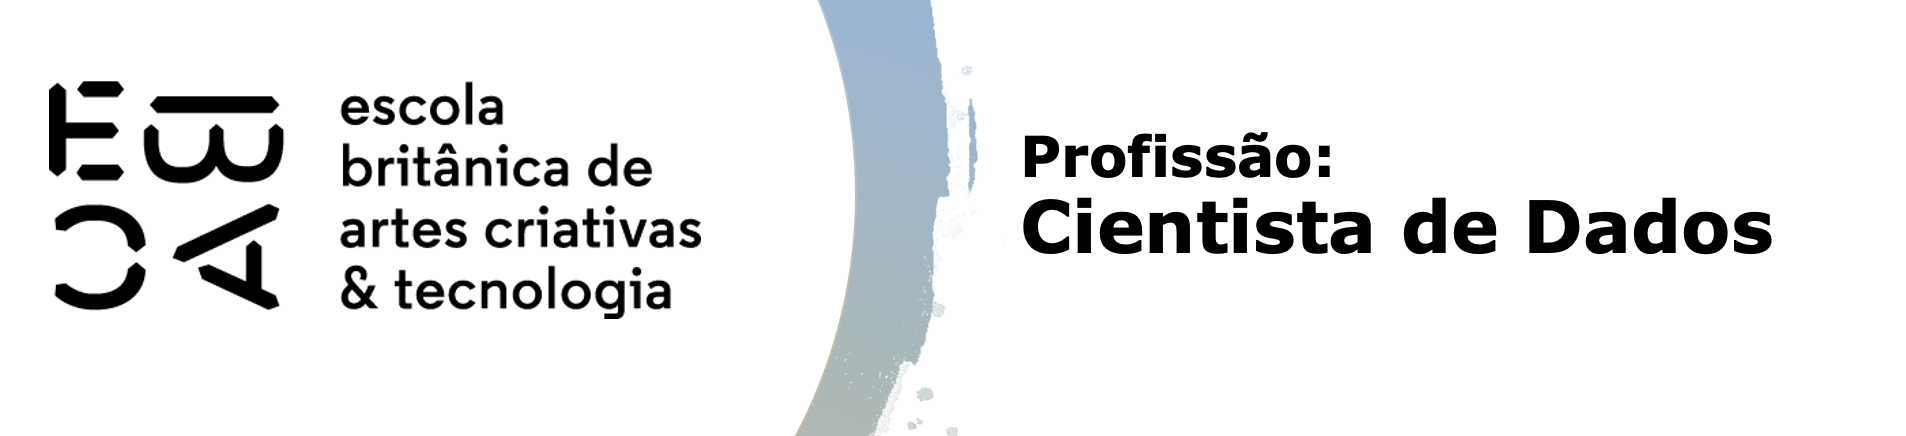

Módulo 24 | Combinação de modelos II | Exercício 2

# Tarefa 02

## 1. Cite 5 diferenças entre o AdaBoost e o GBM:


1. **Erro e Ajuste:**

    - AdaBoost: Foca em ajustar os pesos das amostras mal classificadas após cada iteração.
    - GBM: Foca em ajustar os resíduos ou erros do modelo anterior usando gradiente descendente.

2. **Função de Perda:**

    - AdaBoost: Utiliza uma função de perda exponencial para atualizar os pesos das amostras.
    - GBM: Pode utilizar diferentes funções de perda (quadrática, log-loss, etc.) dependendo do problema.

3. **Correção de Erros:**

    - AdaBoost: Ajusta o modelo em função dos pesos das observações que foram mal classificadas nas iterações anteriores.
    - GBM: Ajusta o modelo com base nos resíduos, ou seja, nas diferenças entre o valor observado e o valor predito.

4. **Algoritmo de Otimização:**

    - AdaBoost: Não utiliza gradiente descendente. Em vez disso, atualiza os pesos diretamente com base na performance do modelo anterior.
    - GBM: Utiliza gradiente descendente para otimizar a função de perda, minimizando o erro.

5. **Sensibilidade a Outliers:**

    - AdaBoost: Mais sensível a outliers, pois aumenta os pesos das observações mal classificadas, o que pode supervalorizar os outliers.
    - GBM: Mais flexível e pode usar regularização para reduzir o impacto de outliers.

## 2. Acesse o link Scikit-learn – GBM, leia a explicação e crie um jupyter notebook contendo o exemplo de classificação e de regressão do GBM.

### 2.1 GradientBoostingClassifier: 

In [17]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.913

### 2.2 GradientBoostingRegressor:


In [24]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]
est = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error'
)
est = est.fit(X_train, y_train)  # fit with 100 trees
mean_squared_error(y_test, est.predict(X_test))
_ = est.set_params(n_estimators=200, warm_start=True)  # set warm_start and increase num of trees
_ = est.fit(X_train, y_train) # fit additional 100 trees to est
print(mean_squared_error(y_test, est.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, est.predict(X_test))))

3.840234741105356
1.9596516887205635


## 3. Cinco Hyperparâmetros Mais Importantes no GBM


- **n_estimators:** Número de árvores a serem treinadas. Quanto maior o número de árvores, mais complexo o modelo.
- **learning_rate:** Controla a contribuição de cada árvore para o modelo final. Um valor menor exige mais árvores, mas pode melhorar a precisão.
- **max_depth:** A profundidade máxima de cada árvore, controlando o quão complexas as árvores podem ser.
- **subsample:** A fração de amostras usadas para treinar cada árvore, útil para evitar overfitting.
- **min_samples_split:** O número mínimo de amostras necessárias para dividir um nó, regulando a complexidade da árvore.

## 4 GridSearch para encontrar os melhores hiperparâmetros (Regressor e Classifier)

**Exemplo 1:** Regressor com o dataset Iris
Primeiro, vamos usar o ``GradientBoostingRegressor``. Para adaptar o dataset Iris, utilizaremos a primeira coluna da variável alvo (y) como uma variável contínua para a regressão.

In [31]:
from sklearn.datasets import load_iris
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

y_reg = y.astype(float)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

gbr = GradientBoostingRegressor()

# Definir os parâmetros para busca
param_grid_reg = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}


grid_search_reg = GridSearchCV(estimator=gbr, param_grid=param_grid_reg, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_reg.fit(X_train_reg, y_train_reg)
print("Melhores parâmetros encontrados para regressão: ", grid_search_reg.best_params_)

best_gbr = grid_search_reg.best_estimator_
mse = best_gbr.score(X_test_reg, y_test_reg)
print(f'R² no conjunto de teste para regressão: {mse}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores parâmetros encontrados para regressão:  {'learning_rate': 0.5, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.8}
R² no conjunto de teste para regressão: 0.9996196710566364


**Exemplo 2:** Classificador com o dataset Iris
Agora, vamos fazer a busca de hiperparâmetros com o ``GradientBoostingClassifier`` para classificação.

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y, test_size=0.2, random_state=42)

gbc = GradientBoostingClassifier()

# Definir os parâmetros para busca
param_grid_clf = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

grid_search_clf = GridSearchCV(estimator=gbc, param_grid=param_grid_clf, cv=5, scoring='accuracy', verbose=1)
grid_search_clf.fit(X_train_clf, y_train_clf)
print("Melhores parâmetros encontrados para classificação: ", grid_search_clf.best_params_)

best_gbc = grid_search_clf.best_estimator_
accuracy = best_gbc.score(X_test_clf, y_test_clf)
print(f'Acurácia no conjunto de teste para classificação: {accuracy}')


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores parâmetros encontrados para classificação:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 50, 'subsample': 1.0}
Acurácia no conjunto de teste para classificação: 1.0


## 5 - Diferença entre GBM e Stochastic GBM (de acordo com Jerome Friedman)

A maior diferença entre GBM e Stochastic GBM (SGBM), proposta por Jerome Friedman, está na introdução da aleatoriedade durante o treinamento das árvores. No Stochastic Gradient Boosting:

- Stochastic GBM: Seleciona uma amostra aleatória dos dados (controlada pelo parâmetro subsample, tipicamente menor que 1.0) para cada árvore em vez de usar todo o conjunto de dados.

- Vantagem: Isso introduz uma aleatoriedade que pode melhorar a generalização do modelo e reduzir o overfitting, além de acelerar o processo de treinamento.
GBM (tradicional): Usa todo o conjunto de dados para treinar cada árvore.

A introdução da amostragem estocástica nas árvores de decisão permite que o modelo capture diferentes aspectos dos dados em cada iteração, resultando em maior robustez e menor overfitting.